#**Visualización de datos en Python**

### **Dataset elegido: datasets de Videojuegos**

> Cuento con 3 datasets que tienen una relación con varias llaves primarias. Los Datasets muestran el rendimiento en ventas en diferentes mercados de varios videojuegos, así como los reviews en Vandal (sitio especializado en videojuegos), y las ventas de cada consola.

Descripción de los datasets:

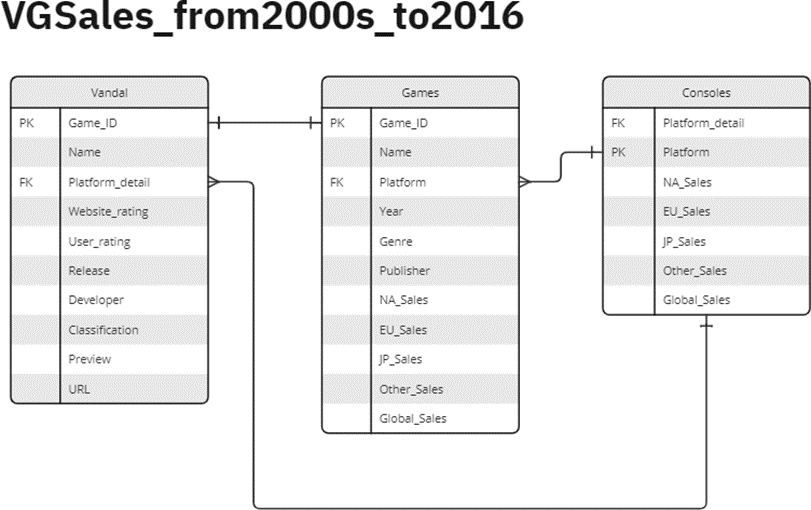


##Carga de datos con Pandas:

In [504]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Primer dataframe de la serie: **games**

In [505]:
from google.colab import drive

games = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/vgsales_cln.xlsx')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
4,5,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [506]:
# Princiapl información del dataset
print('Estructura de dataFrame:', games.shape)
games.info()

Estructura de dataFrame: (3768, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          3768 non-null   int64  
 1   Name          3768 non-null   object 
 2   Platform      3768 non-null   object 
 3   Year          3768 non-null   int64  
 4   Genre         3768 non-null   object 
 5   Publisher     3768 non-null   object 
 6   NA_Sales      3768 non-null   float64
 7   EU_Sales      3768 non-null   float64
 8   JP_Sales      3768 non-null   float64
 9   Other_Sales   3768 non-null   float64
 10  Global_Sales  3768 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 323.9+ KB


In [507]:
# Describimos el dataset
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000
mean,1884.500000,2008.532113,0.472710,0.310332,0.089196,0.106038,0.978426
std,1087.872235,4.792706,1.209768,0.860273,0.343464,0.346039,2.483122
min,1.000000,1981.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,942.750000,2005.000000,0.050000,0.020000,0.000000,0.010000,0.130000
50%,1884.500000,2009.000000,0.160000,0.090000,0.000000,0.030000,0.370000
75%,2826.250000,2012.000000,0.450000,0.290000,0.040000,0.090000,0.940000
max,3768.000000,2016.000000,41.490000,29.020000,6.500000,10.570000,82.740000


In [508]:
# Comprobación y eliminación de datos nulos

In [509]:
# El dataset cuenta con datos nulos
num_missing_games = (games[['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Global_Sales']] == 0).sum()
num_missing_games

Rank               0
Name               0
Platform           0
Year               0
Genre              0
Publisher          0
NA_Sales         480
EU_Sales         367
JP_Sales        2282
Other_Sales      604
Global_Sales       0
dtype: int64

In [510]:
# Reemplazamos datos nulos
games[['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Global_Sales']] = games[['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Global_Sales']].replace(0, np.nan)
games[['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Global_Sales']].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
4,5,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [511]:
# Comprobación de eliminación de datos nulos
num_missing_games = (games[['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Global_Sales']] == 0).sum()
num_missing_games

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

##Segundo dataframe de la serie: **consoles**

In [512]:
consoles = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/cgsales_clean.xlsx')
consoles.head()

,Platform_detail,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PlayStation 2,PS2,53.65,55.28,23.18,26.59,158.70
1,Nintendo DS,DS,57.92,51.84,32.99,11.28,154.02
2,Nintendo Switch,NS,44.60,31.56,28.71,19.04,123.91
3,Game Boy,GB,43.18,40.05,32.47,2.99,118.69
4,PlayStation 4,PS4,38.14,45.83,9.61,23.43,117.02


In [513]:
# Princiapl información del dataset
print('Estructura de dataFrame:', consoles.shape)
consoles.info()

Estructura de dataFrame: (83, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform_detail  83 non-null     object 
 1   Platform         83 non-null     object 
 2   NA_Sales         83 non-null     float64
 3   EU_Sales         83 non-null     float64
 4   JP_Sales         83 non-null     float64
 5   Other_Sales      83 non-null     float64
 6   Global_Sales     83 non-null     float64
dtypes: float64(5), object(2)
memory usage: 4.7+ KB


In [514]:
# Describimos el dataset
consoles.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,83.000000,83.000000,83.000000,83.000000,83.000000
mean,8.711566,6.112771,3.969398,2.364337,21.540241
std,15.479677,12.685399,7.996044,5.368374,38.964424
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.165000
50%,0.000000,0.000000,0.030000,0.000000,1.500000
75%,12.000000,5.090000,3.285000,0.965000,21.545000
max,57.920000,55.280000,32.990000,26.590000,158.700000


In [515]:
# Comprobación y eliminación de datos nulos

In [516]:
# El dataset no cuenta con datos nulo
num_missing_consoles = (games[['Platform',	'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Global_Sales']] == 0).sum()
num_missing_consoles

Platform        0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

##Tercer dataframe de la serie: **vandal**

In [517]:
vandal = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/vandal_coment_clean.xlsx')
vandal.head()

,Game_ID,Game,Platform_detail,Platform,website_rating,user_rating,release,year,developer,classification,preview,url
0,007Racing_PS,007 Racing,PlayStation,PS,6.9,4.88,2001-01-01,2001,EA Games & Electronic Arts,NaN,"Bond, James BondCon la reciente tirada de titu...",NaN
1,007:QuantumofSolace_X360,007: Quantum of Solace,Xbox 360,X360,7.1,6.58,2008-11-07,2008,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...
2,007:QuantumofSolace_PS3,007: Quantum of Solace,PlayStation 3,PS3,7.1,6.97,2008-11-07,2008,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...
3,007:QuantumofSolace_Wii,007: Quantum of Solace,Nintendo Wii,Wii,0.0,7.50,2008-11-07,2008,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...
4,300:MarchtoGlory_PSP,300: March to Glory,PlayStation Portable,PSP,6.5,7.24,2007-03-30,2007,Collision Studios & Warner Bros.,PEGI +18,"Sin duda, uno de los estrenos de cine mas espe...",https://vandal.elespanol.com/analisis/psp/300-...


In [518]:
# Princiapl información del dataset
print('Estructura de dataFrame:', vandal.shape)
vandal.info()

Estructura de dataFrame: (3998, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Game_ID          3998 non-null   object        
 1   Game             3998 non-null   object        
 2   Platform_detail  3998 non-null   object        
 3   Platform         3998 non-null   object        
 4   website_rating   3998 non-null   float64       
 5   user_rating      3998 non-null   float64       
 6   release          3998 non-null   datetime64[ns]
 7   year             3998 non-null   int64         
 8   developer        3998 non-null   object        
 9   classification   3112 non-null   object        
 10  preview          3997 non-null   object        
 11  url              3673 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 374.9+ KB


In [519]:
# Describimos el dataset
vandal.describe()

,website_rating,user_rating,year
count,3998.000000,3998.000000,3998.000000
mean,6.548337,7.210955,2009.298149
std,3.146234,2.105616,4.544738
min,0.000000,0.000000,1995.000000
25%,6.200000,6.840000,2006.000000
50%,7.800000,7.700000,2009.000000
75%,8.600000,8.370000,2013.000000
max,10.000000,10.000000,2019.000000


In [520]:
# Comprobación y eliminación de datos nulos

In [521]:
#Nos encontramos con datos nulos
num_missing_vandal = (vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']] == 0).sum()
num_missing_vandal

Game_ID              0
Game                 0
Platform_detail      0
Platform             0
website_rating     676
user_rating        217
release              0
developer            0
classification       0
preview              0
url                  0
year                 0
dtype: int64

In [522]:
# Reemplazamos datos nulos
vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']] = vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']].replace(0, np.nan)
vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']].head()

,Game_ID,Game,Platform_detail,Platform,website_rating,user_rating,release,developer,classification,preview,url,year
0,007Racing_PS,007 Racing,PlayStation,PS,6.9,4.88,2001-01-01,EA Games & Electronic Arts,NaN,"Bond, James BondCon la reciente tirada de titu...",NaN,2001
1,007:QuantumofSolace_X360,007: Quantum of Solace,Xbox 360,X360,7.1,6.58,2008-11-07,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...,2008
2,007:QuantumofSolace_PS3,007: Quantum of Solace,PlayStation 3,PS3,7.1,6.97,2008-11-07,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...,2008
3,007:QuantumofSolace_Wii,007: Quantum of Solace,Nintendo Wii,Wii,NaN,7.50,2008-11-07,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...,2008
4,300:MarchtoGlory_PSP,300: March to Glory,PlayStation Portable,PSP,6.5,7.24,2007-03-30,Collision Studios & Warner Bros.,PEGI +18,"Sin duda, uno de los estrenos de cine mas espe...",https://vandal.elespanol.com/analisis/psp/300-...,2007


In [523]:
# Comprobación de eliminación de datos nulos
num_missing_vandal = (vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']] == 0).sum()
num_missing_vandal

Game_ID            0
Game               0
Platform_detail    0
Platform           0
website_rating     0
user_rating        0
release            0
developer          0
classification     0
preview            0
url                0
year               0
dtype: int64

##**Graficos con Matplotlib**

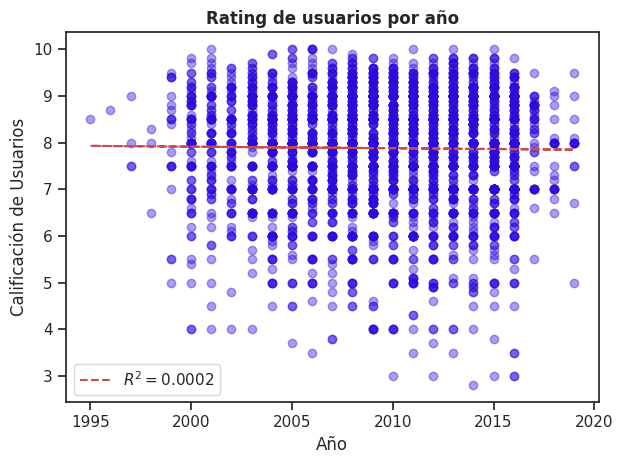

In [524]:
# 1er Grafico - análisis debajo
# Determinación de variables
vandal_year = vandal['year']
website_rating = vandal['website_rating']

# Creo una subtabla para filtrar los datos nulos
valid_indices_web = ~np.isnan(website_rating)
valid_indices_user = ~np.isnan(vandal_year)

web_valid = website_rating[valid_indices_web]
year_valid = vandal_year[valid_indices_user]

# Determino el máximo de datos por cada tabla, para que el modelo no de error por diferencia respecto de los datos nulos
min_length = min(len(web_valid), len(year_valid))
web_valid = web_valid[:min_length]
year_valid = year_valid[:min_length]

# Cálculo de línea de tendencia con numpy
z = np.polyfit(year_valid, web_valid, 1)
p = np.poly1d(z)

# Cálculo de r2 con numpy
corr_matrix = np.corrcoef(year_valid, web_valid)
corr = corr_matrix[0, 1]
r_square = round(corr**2, 4)
texto = r'$R^2 = {}$'.format(r_square)

# Confección del gráfico
fig, disp_graf = plt.subplots()

disp_graf.scatter(year_valid, web_valid, c="#2E0ADB", alpha=0.4)
disp_graf.plot(year_valid, p(year_valid), 'r--', label=texto)

# Contextualización del gráfico
disp_graf.set_title('Rating de usuarios por año', fontweight='bold')
disp_graf.set_xlabel('Año')
disp_graf.set_ylabel('Calificación de Usuarios')

# Muestro el gráfico
plt.tight_layout()
plt.legend()
plt.show()

###Analisis del 1er gráfico:
* Analizo la relación que hay entre el **rating que indican los usuarios para un videojuego vs. el año de lanzamiento**. Para analizar esto, genero un gráfico de dispersión (o scatterplot), y luego un línea de tendencia, indicando la regresión lineal de los datos.



* El objetivo del análisis es encontrar si el año de lanzamiento tiene incidencia sobre la valoración indicada por el usuario.


* El resultado principal obtenido, es que R^2 = 0.0002, por lo tanto R^2 < 0.5, por lo que no estamos frente a un modelo válido, en donde podamos tomar que el año incide en los comentarios indicados por los usuarios.

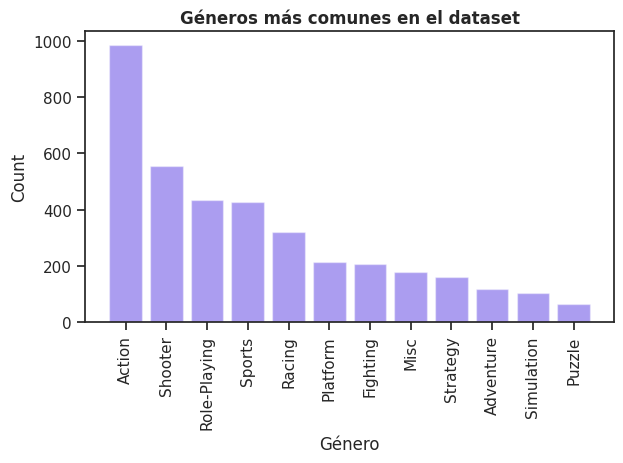

In [526]:
# 2do Grafico - análisis debajo
frecuencias = games['Genre'].value_counts()

# Ordeno los géneros por cantidad
generos_ordenados = frecuencias.index.tolist()
frecuencias_ordenadas = frecuencias.tolist()

# Confección del gráfico
fig, bar_graf = plt.subplots()
bar_graf.bar(generos_ordenados, frecuencias_ordenadas, color="#2E0ADB", alpha=0.4)
plt.xticks(rotation='vertical')

plt.xlabel('Género', )
plt.ylabel('Count')
plt.title('Géneros más comunes en el dataset', fontweight='bold')
plt.tight_layout()
plt.show()

###Analisis del 2do gráfico:
* Analizo la distribución de juegos por el Género indicado. Esto nos da una idea de ver cuantas tipos de categorías de videojuegos tenemos y cuales son las más utilizadas.

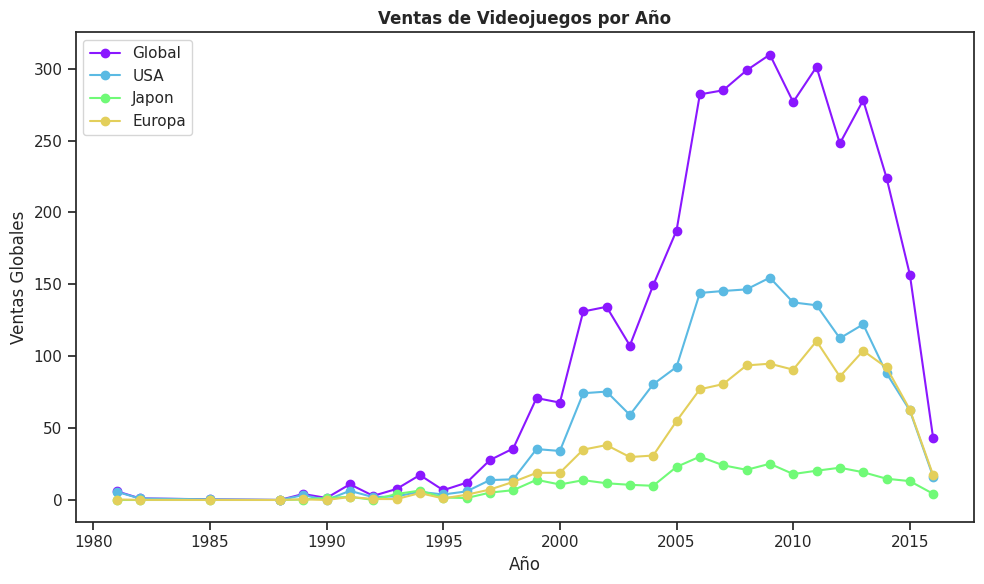

In [527]:
# 3er Grafico - análisis debajo
#LinePlot
sales_by_year_global = games.groupby('Year')['Global_Sales'].sum()
sales_by_year_usa = games.groupby('Year')['NA_Sales'].sum()
sales_by_year_jp = games.groupby('Year')['JP_Sales'].sum()
sales_by_year_europa = games.groupby('Year')['EU_Sales'].sum()


# Confección del gráfico
plt.figure(figsize=(10, 6))  # Tamaño opcional para ajustar el gráfico
plt.plot(sales_by_year_global.index, sales_by_year_global.values, marker='o', label='Global', color='#8A17FF')
plt.plot(sales_by_year_usa.index, sales_by_year_usa.values, marker='o', label='USA', color='#5BBAE3')
plt.plot(sales_by_year_jp.index, sales_by_year_jp.values, marker='o', label='Japon', color='#70FA77')
plt.plot(sales_by_year_europa.index, sales_by_year_europa.values, marker='o', label='Europa', color='#E3CF5B')

# Contextualización del gráfico
plt.xlabel('Año')
plt.ylabel('Ventas Globales')
plt.title('Ventas de Videojuegos por Año', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

###Analisis del 3er gráfico:
* Analizo la cantidad de ventas de videojuegos a manera global en el dataset, así como en cada región geográfica analizada, tales como Japón, USA y Europa. El fin es contar con la información del crecimiento de cada uno de los mercados analizados.

<ipython-input-528-40854bff1583>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(na_sales, regression_line,'r--', color='red', label=texto)


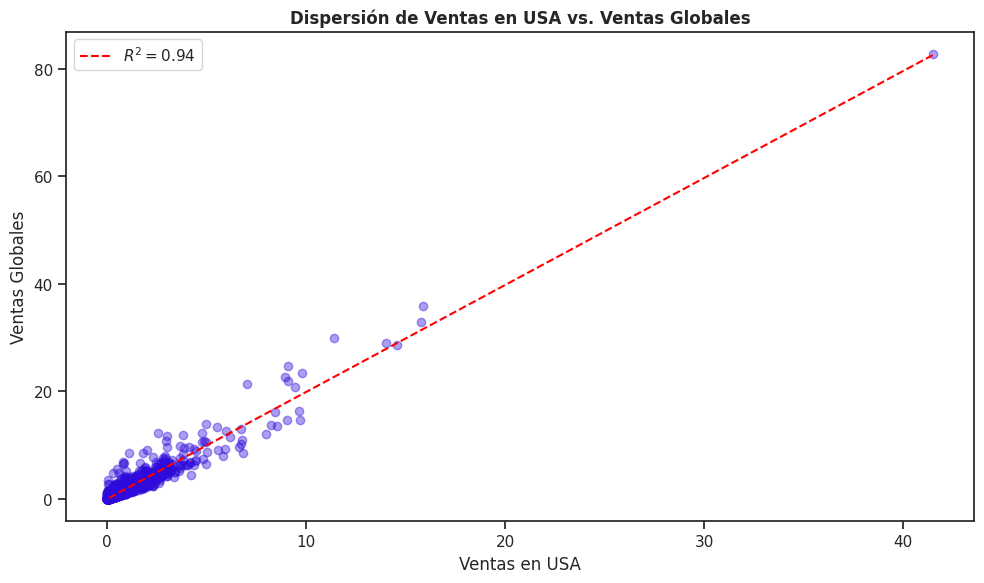

In [528]:
# 4to Grafico - análisis debajo
# Filtro según nulos
filtered_games = games.dropna(subset=['Global_Sales', 'NA_Sales'])

# Obtener las variables filtradas
global_sales = filtered_games['Global_Sales']
na_sales = filtered_games['NA_Sales']

# Calcular la pendiente e intercepto de la regresión lineal
slope, intercept = np.polyfit(na_sales, global_sales, 1)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(na_sales, global_sales, alpha=0.4, color="#2E0ADB")

# Cálculo de r2 con numpy
corr_matrix = np.corrcoef(global_sales, na_sales)
corr = corr_matrix[0, 1]
r_square = round(corr**2, 2)
texto = r'$R^2 = {}$'.format(r_square)

# Línea de regresión
regression_line = slope * na_sales + intercept
plt.plot(na_sales, regression_line,'r--', color='red', label=texto)

# Etiquetas y título
plt.xlabel('Ventas en USA')
plt.ylabel('Ventas Globales')
plt.title('Dispersión de Ventas en USA vs. Ventas Globales', fontweight='bold')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

###Analisis del 4to gráfico:
* Analizo la distribución de las ventas en USA vs las Ventas Globales de videojuegos. Lo que analizo aquí es qué porcentaje del éxito de un proyecto en USA, explica el éxito a nivel global.

* El resultado principal obtenido, es que R^2 = 0.94, por lo tanto R^2 < 0.5, por lo que estamos en condiciones de afirmar que las ventas en USA explican en gran medida el éxito a nivel global de las ventas de videojuegos.

##**Graficos con Seaborn**

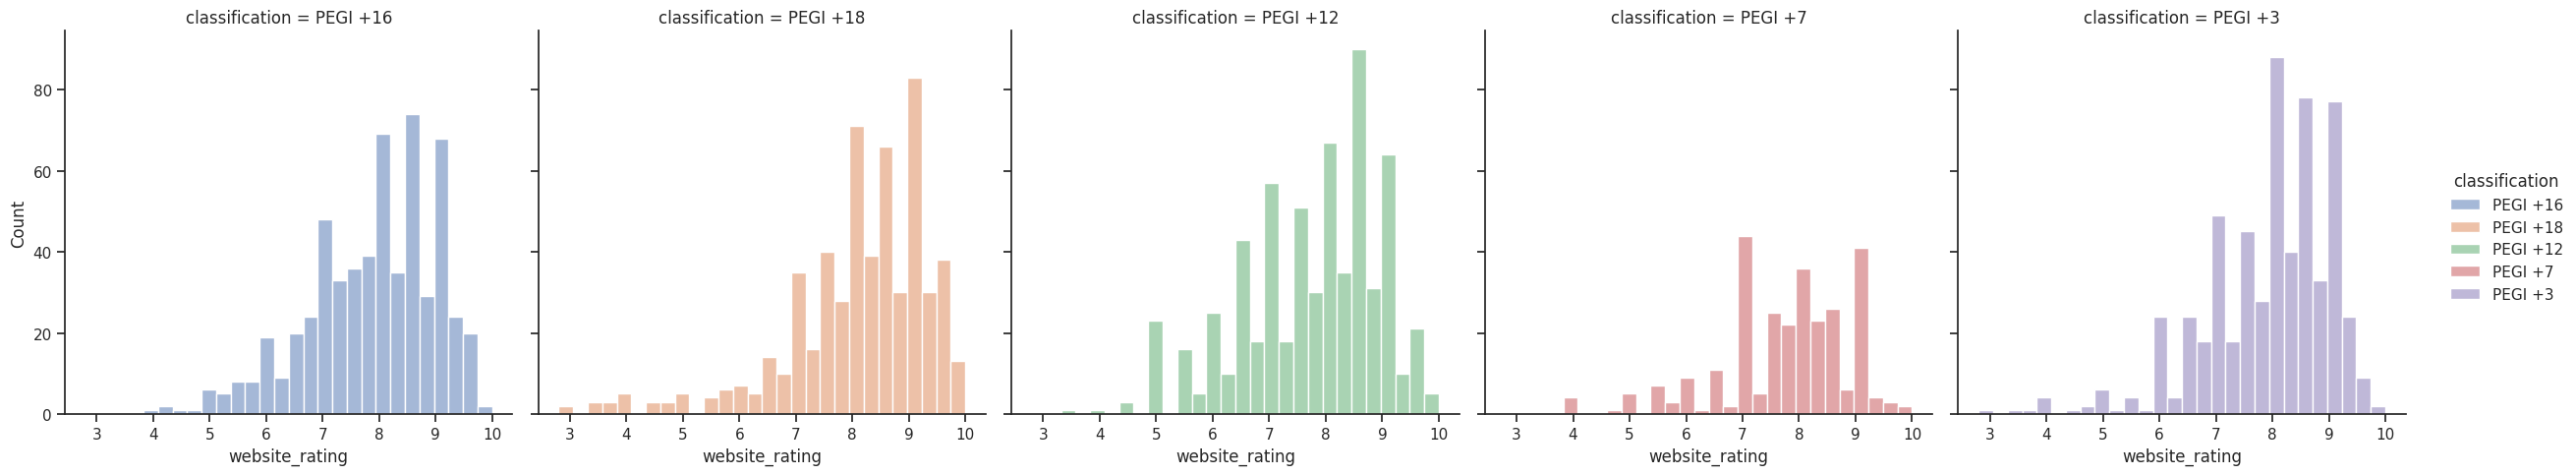

In [529]:
# 1er Grafico - análisis debajo
# En este caso no es necesario determinar previamente las variables
sns.set_theme(style="ticks") # seteo del tema elegido
sns.displot(data=vandal, x="website_rating", hue="classification", col="classification")

# Mostramos el gráfico
plt.show()

###Analisis del 1er gráfico:
* Analizo la distribución del rating indicado por Vandal según la clasificación que haya en límite de edad para los videojuegos. El objetivo es encontrar si la clasificación influye en el rating indicado por Vandal.

* A priori no observo que haya algún cambio en esta relación. Por lo cual no es una variable que sea relevanete en la calificación.

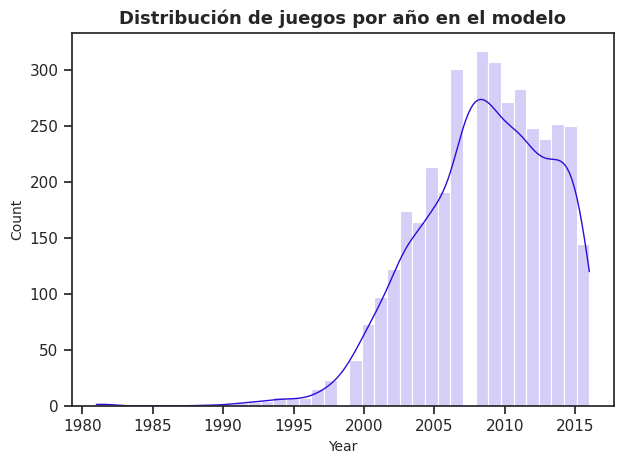

In [530]:
# 2do Grafico - análisis debajo
# En este caso no es necesario determinar previamente las variables
sns.set_theme(style="ticks") # seteo del tema elegido
fig, hist_plot = plt.subplots()

# Creación del gráfico
sns.histplot(data=games['Year'], kde = True, line_kws= {'linewidth': 1}, color="#2E0ADB", alpha   = 0.2)

# Etiquetas y título
hist_plot.set_ylabel('Count', fontsize = 10)
hist_plot.set_xlabel('Year', fontsize = 10)
hist_plot.set_title('Distribución de juegos por año en el modelo', fontsize = 13, fontweight = "bold")

# Mostramos el gráfico
plt.tight_layout()
plt.show()

###Analisis del 2do gráfico:
* Analizo la distribución de la cantidad de juegos con los años. A priori obervamos que la ditribución no es normal entre las dos variables, ya que estamos en una situación similar a un Pareto, en donde más de un 80% de los casos se concentran desde 1995 a 2015.

* También podemos ver que hay pérdida de datos en el año 2008, esto si bien debe estudiarse mejor, es probable que sea por la recesión económica del año 2008, lo cual puede generar cierto sentido.

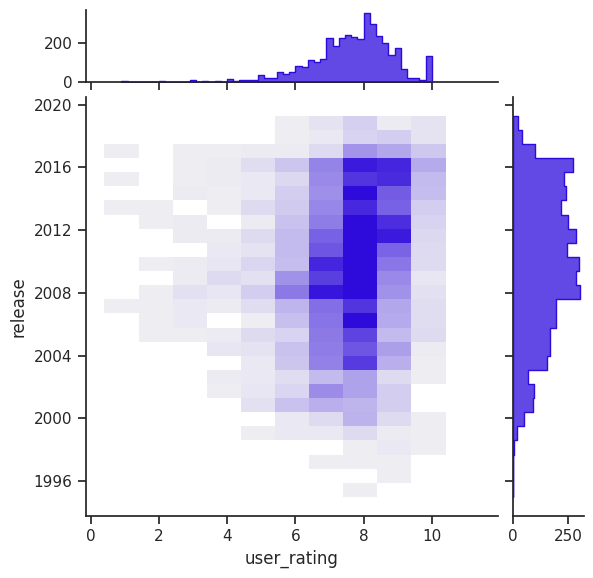

In [531]:
# 3er Grafico - análisis debajo
# En este caso no es necesario determinar previamente las variables
sns.set_theme(style="ticks") # seteo del tema elegido
dispersion = sns.JointGrid(data=vandal, x="user_rating", y="release", marginal_ticks=True)

# Add the joint and marginal histogram plots
dispersion.plot_joint(sns.histplot, discrete=(True, False), cmap="light:#2E0ADB", pmax=.8, cbar=True, cbar_ax=cax)
dispersion.plot_marginals(sns.histplot, element="step", color="#2E0ADB")

plt.show()

###Analisis del 3er gráfico:
* Analizo la relación que hay entre el **la fecha de lanzamiento de un videojuego vs. el puntaje de los usuarios**. Para analizar esto, genero un gráfico de dispersión con profundidad, donde analizamos la dispersión mediante un scatterplot y la profundidad mediante un histograma.


* El objetivo del análisis es encontrar si el rating indicado por los usuarios tiene relación con el año de lanzamiento. Esto se genera con la hipótesis de pensar que el perfeccionamiento de las técnicas de animación y modelado hayan generado mayor satisfacción en los usuarios.


* El resultado no es concluyente con la hipótesis a priori. En el gráfico podemos observar que, si bien existe una mayor concentración de puntajes altos en años recientes, no termina siendo determinante para validar la hipótesis.

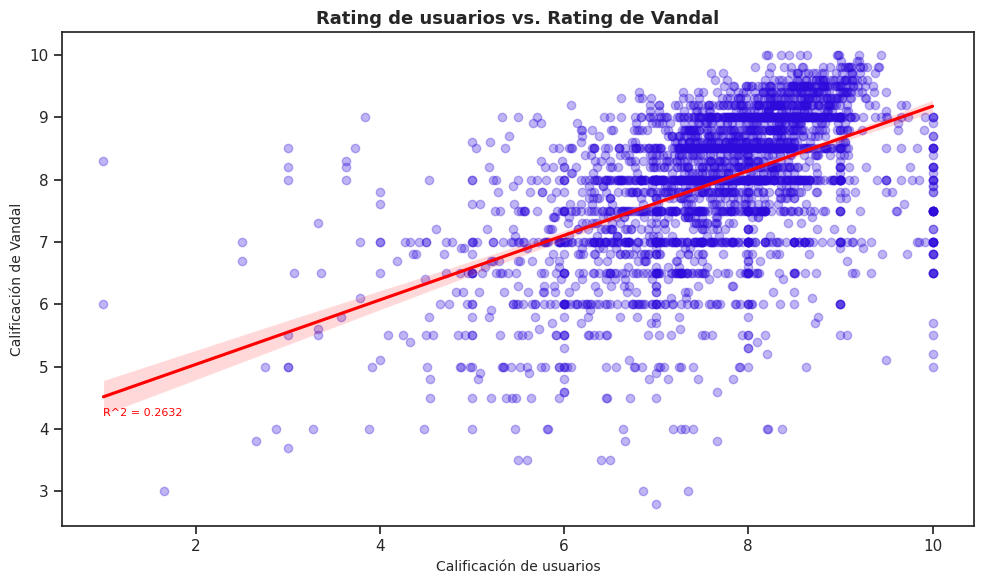

In [532]:
# 4to Grafico - análisis debajo
# Determinación de variables
user_rating_vandal = vandal['user_rating']
website_rating_vandal = vandal['website_rating']

# Creación del gráfico de correlación en seaborn
sns.set_theme(style="ticks") # seteo del tema elegido
plt.figure(figsize=(10, 6))
sns.regplot(x=user_rating_vandal, y=website_rating_vandal, scatter_kws={'alpha':0.3, 'color':'#2E0ADB'}, line_kws={'color':'red'})

# Filtrar datos válidos
valid_indices = ~np.isnan(user_rating_vandal) & ~np.isnan(website_rating_vandal)
x_valid = user_rating_vandal[valid_indices]
y_valid = website_rating_vandal[valid_indices]

# Calcular la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x_valid, y_valid)

from scipy.stats import linregress
# Calcular R^2
r_squared = r_value**2
texto = r'R^2 = {}'.format(round(r_squared, 4))

# Cálculo de línea de tendencia con numpy
z = np.polyfit(user_valid, web_valid, 1)
p = np.poly1d(z)

# Etiquetas y título
plt.xlabel('Calificación de usuarios', fontsize=10)
plt.ylabel('Calificación de Vandal', fontsize=10)
plt.title('Rating de usuarios vs. Rating de Vandal', fontsize=13, fontweight='bold')

# Mostrar resultado
plt.text(1, 4.2, texto, fontsize = 8, color = 'red')
plt.tight_layout()
plt.show()

###Analisis del 4to gráfico:
* Analizo la relación que hay entre el **rating que indican los usuarios para un videojuego vs. el rating indicado por el sitio web Vandal**. Para analizar esto, genero un gráfico de dispersión (o scatterplot), y luego un línea de tendencia, indicando la regresión lineal de los datos.



* El objetivo del análisis es encontrar si el rating indicado por el sitio web Vandal, es **relevante** para los usuarios que puntúan el videojuego.


* El resultado principal obtenido, es que R^2 = 0,26, por lo tanto R^2 < 0.5, por lo que no estamos frente a un modelo válido, en donde podamos tomar que los comentarios de Vandal generen una gran participación en los comentarios de los usuarios. En otras palabras, un 26% de los resultados de los usuarios, se explican por los comentarios de Vandal.